# Import Libraries and Data

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
food = pd.read_csv(r'.\u_food_marketing.csv')

food

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,1,0,0,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,35,2576,0,1,0,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,1,0,0,0,0,0,1,44,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


# Data Cleaning

#### Check for duplicates and drop those rows

In [31]:
food[food.duplicated()].count()   #Gives the number of duplicate rows

Income                  184
Kidhome                 184
Teenhome                184
Recency                 184
MntWines                184
MntFruits               184
MntMeatProducts         184
MntFishProducts         184
MntSweetProducts        184
MntGoldProds            184
NumDealsPurchases       184
NumWebPurchases         184
                       ... 
marital_Married         184
marital_Single          184
marital_Together        184
marital_Widow           184
education_2n Cycle      184
education_Basic         184
education_Graduation    184
education_Master        184
education_PhD           184
MntTotal                184
MntRegularProds         184
AcceptedCmpOverall      184
Length: 39, dtype: int64

In [32]:
food.drop_duplicates(keep= False, inplace = True)

In [26]:
#food.info()

#### Cleaning Columns

In [33]:
food['Total_Children'] = food[['Kidhome', 'Teenhome']].sum(axis= 1)

In [41]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5, 0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4, 0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3, 0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2, 0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1, 0:0})

food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis= 1)
food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

In [50]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1, 0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2, 0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3, 0:0})
food['education_Master'] = food['education_Master'].replace({1:4, 0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5, 0:0})

food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis= 1)
food['Education_Status_str'] = food['Education_Status'].map({5: 'Doctorate', 4: 'Master', 3: 'Bachelor', 2: 'High School', 1: 'Non-High School'})

In [79]:
food['Accepted_Campaigns'] = food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1', 'Response']].sum(axis= 1)
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)                        

#Did they accept a campaign? Yes (1), No (0)


# Data Exploration

#### Correlations

In [62]:
food.corr(method= 'pearson', numeric_only= True)['Accepted_Campaigns'].sort_values(ascending= False)

Accepted_Campaigns     1.000000
AcceptedCmpOverall     0.859712
AcceptedCmp4           0.561592
AcceptedCmp3           0.546838
AcceptedCmp5           0.531799
AcceptedCmp1           0.514231
MntWines               0.461281
MntTotal               0.408568
MntRegularProds        0.408493
Response               0.360220
Income                 0.328398
NumCatalogPurchases    0.320972
                         ...   
Recency               -0.016263
marital_Divorced      -0.019814
education_2n Cycle    -0.022999
Complain              -0.024979
education_Basic       -0.047035
NumDealsPurchases     -0.080932
Teenhome              -0.090491
NumWebVisitsMonth     -0.113625
Kidhome               -0.223343
Total_Children        -0.227857
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Accepted_Campaigns, Length: 43, dtype: float64

<Axes: >

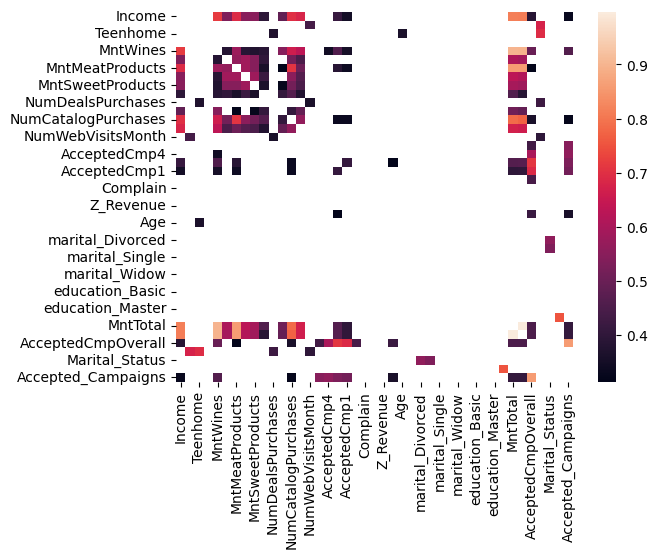

In [66]:
all_corr = food.corr(method= 'pearson', numeric_only= True)
all_corr = all_corr[(all_corr > 0.3) & (all_corr < 1)]

sns.heatmap(all_corr)

In [78]:
all_corr['Accepted_Campaigns']

Income                  0.328398
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.461281
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
                          ...   
education_2n Cycle           NaN
education_Basic              NaN
education_Graduation         NaN
education_Master             NaN
education_PhD                NaN
MntTotal                0.408568
MntRegularProds         0.408493
AcceptedCmpOverall      0.859712
Total_Children               NaN
Marital_Status               NaN
Education_Status             NaN
Accepted_Campaigns           NaN
Name: Accepted_Campaigns, Length: 43, dtype: float64

#### Create Age Groups

In [83]:
age_groups = [(23, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 85)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f'{age_range[0]} - {age_range[1]}'
    return ('Unkown')

food['Age_Group'] = food['Age'].apply(assign_age_group)

age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']

<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

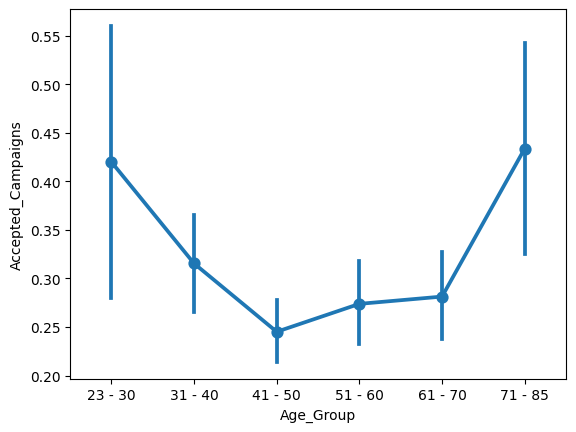

In [109]:
sns.pointplot(data= food, x = 'Age_Group', y = 'Accepted_Campaigns', order= age_order)

In [110]:
age_counts = food['Age_Group'].value_counts()
age_percent = age_counts / food.shape[0]

In [112]:
percent_food = age_percent.reset_index()
percent_food.columns = ['age_group', 'percentage']
percent_food.sort_values('age_group')


,age_group,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


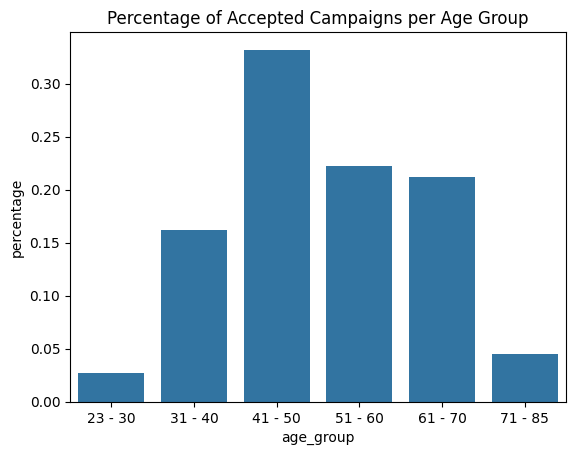

In [118]:
sns.barplot(x = 'age_group', y = 'percentage', data= percent_food, order= age_order)

plt.title('Percentage of Accepted Campaigns per Age Group')
plt.show()

In [75]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Bachelor,0,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Bachelor,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Bachelor,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Bachelor,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,Doctorate,0,31 - 40
